In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import os

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '1_Data_Wrangling_Exploration.ipynb',
 '2_Linear_regression_Admission_Predict.ipynb',
 '3_Logistic_Regression.ipynb',
 '4_Decision_Trees.ipynb',
 '5_Random_Forest.ipynb',
 '6_K_Means_Clustering.ipynb',
 '7_dbscan_clustering.ipynb',
 '9_ARM_Market_Basket_Analysis.ipynb',
 'Admission_Predict.csv',
 'Anaconda3-2020.11-Windows-x86_64.exe',
 'Assignments',
 'balance-scale_dd.txt',
 'bank-additional-full.csv',
 'bank-additional-names.txt',
 'bill_authentication.csv',
 'cars.csv',
 'Cov_Cor.PNG',
 'customers.csv',
 'customer_churn.csv',
 'data.csv',
 'diabetes.csv',
 'IMDB-Movie-Data.csv',
 'Information-Value-IV-and-Weight-of-Evidence-WOE.xlsx',
 'insurance.csv',
 'Logistic_Regression.ipynb',
 'project_assignment_on_customer_churn.ipynb',
 'python_intellipaat_basic_intro.ipynb',
 'python_intro1.ipynb',
 'python_practise']

# Load MNIST handwritten dataset

In [10]:
from sklearn.datasets import load_digits, fetch_openml #load_digits helps us fetch MNIST data

In [11]:
digits= load_digits() #saving dataset to variable name digits
#load_digits contains two things ie data itself and target variable 
#which we can fetch using dot syntax

In [12]:
print(digits.data.shape) #this data contains pictures, hence shape tell us that data has 1797 picture
#each picture has 64 pixels
print(digits.target.shape)

(1797, 64)
(1797,)


In [17]:
def plot_image(data,target,fig_size=(20,5),img_size=(8,8)):
    plt.figure(figsize=fig_size)
    for index,(image,label) in enumerate(zip(data[:5],target[:5])):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(image,img_size),cmap=plt.cm.gray)
        plt.title("Labels {} ".format(label),fontsize=20)

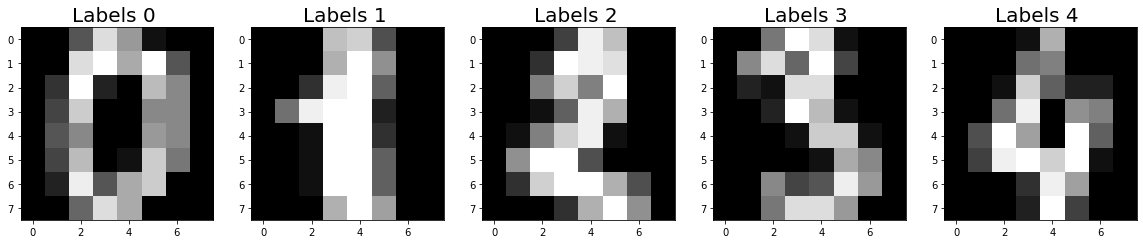

In [18]:
plot_image(digits.data,digits.target)

# Splitting and fitting Model

In [20]:
x_train,x_test,y_train,y_test= train_test_split(digits.data,digits.target,test_size=0.25,
                                               random_state=0)

In [22]:
print(x_train.shape)
print(y_train.shape)

(1347, 64)
(1347,)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
my_model = LogisticRegression()

In [26]:
my_model.fit(x_train,y_train)

C:\Users\Public\python_installed_anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
prediction = my_model.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.9511111111111111

In [31]:
conf_mat = confusion_matrix(y_test,prediction)
conf_mat

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

In [43]:
#getting misqualified image's index
def get_misqualified_index(prediction,y_test):
    misqualified_index=[]
    for index,(actual,predicted) in enumerate(zip(y_test,prediction)):
        if actual != predicted:
            misqualified_index.append(index)
    return misqualified_index
            

In [50]:
#plotting misqualified images
def plot_misclassifications(misqualified_index,fig_size=(20,4),img_size=(8,8),limit=5):
    plt.figure(figsize=fig_size)
    for index,wrong in enumerate(misqualified_index[0:limit]):
        plt.subplot(1,5,index+1)
        plt.imshow(np.reshape(x_test[wrong],img_size),cmap=plt.cm.gray)
        plt.title("Actual : {} predicted : {}".format(y_test[wrong],prediction[wrong]),fontsize=15)
        print(wrong)
        

In [45]:
misqualified_index=get_misqualified_index(prediction,y_test)
misqualified_index

[56,
 94,
 118,
 124,
 130,
 169,
 181,
 196,
 213,
 235,
 251,
 315,
 325,
 331,
 335,
 378,
 398,
 415,
 425,
 429,
 430,
 440]

56
94
118
124
130


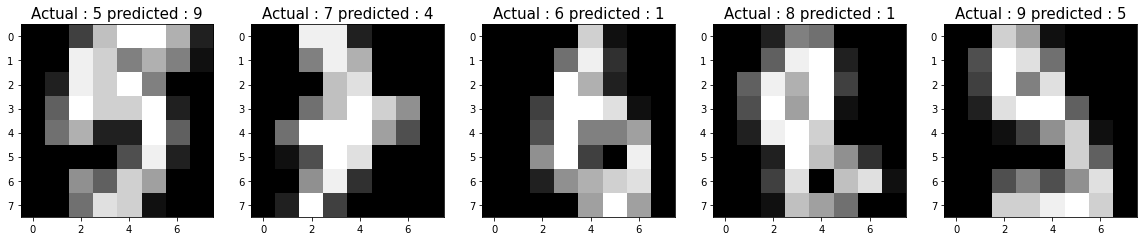

In [51]:
plot_misclassifications(misqualified_index)